In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import pickle
from netCDF4 import Dataset
from pyproj import Proj
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [15]:
# Data

test = xr.open_dataset(r'C:\Users\prith\pointsource_exp1_new.nc')                  #point N
#test = xr.open_dataset(r'C:\Users\prith\pointsource_exp1_new_farsource.nc')        #point N'
#test = xr.open_dataset(r'C:\Users\prith\pointsource_exp1_new_nearsource.nc')       #point N"
#test = xr.open_dataset(r'C:\Users\prith\pointsource_exp1_new_askoy.nc')            #point A
#test = xr.open_dataset(r'C:\Users\prith\pointsource_exp1_new_askoy_farsource.nc')  #point A'
#test = xr.open_dataset(r'C:\Users\prith\pointsource_exp1_new_askoy_nearsource.nc') #point A"



test

<xarray.Dataset>
Dimensions:     (trajectory: 60000, time: 2667)
Coordinates:
  * trajectory  (trajectory) int32 1 2 3 4 5 6 ... 59996 59997 59998 59999 60000
  * time        (time) datetime64[ns] 2010-03-27T16:00:00 ... 2010-07-16T18:0...
Data variables:
    status      (trajectory, time) int32 ...
    lon         (trajectory, time) float32 ...
    lat         (trajectory, time) float32 ...
Attributes: (12/116)
    Conventions:                                                             ...
    standard_name_vocabulary:                                                ...
    featureType:                                                             ...
    history:                                                                 ...
    source:                                                                  ...
    model_url:                                                               ...
    ...                                                                                                               ...
    geospatial_lat_resolution:                                               ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...
    geospatial_lon_units:                                                    ...
    geospatial_lon_resolution:                                               ...
    runtime:                                                                 ...

In [16]:
lontest = np.array(test['lon'])# longitude values
lattest = np.array(test['lat']) # latitude values
shape_new=np.shape(lattest)

In [17]:
%%time
#%% Extracting locations: longitude of starting and ending points
a=np.array([0,0])
a=np.reshape(a,(1,2))
lontest[lontest>100]=np.nan
for ij in range(0,shape_new[0]):
    c=lontest[ij][~np.isnan(lontest[ij])]
    c_k = np.where(~np.isnan(lontest[ij])==True)
    if np.shape(c_k)[1]==0:
        print('empty array')
    else:
        a_new=np.concatenate((c[0],c[len(c)-1]),axis=None)
        a_new=np.reshape(a_new,(1,2))
        a=np.concatenate((a,a_new),axis=0)
        
longitude_values=np.array(a[1:])

CPU times: total: 2.34 s
Wall time: 2.4 s


In [18]:
%%time
#%% extracting locations: Latitude of starting and ending points
b=np.array([0,0])
b=np.reshape(b,(1,2))
lattest[lattest>100]=np.nan
for kl in range(0,shape_new[0]):    
    d=lattest[kl][~np.isnan(lattest[kl])]
    d_k = np.where(~np.isnan(lattest[kl])==True)
    if np.shape(d_k)[1]==0:
        print('empty array')
    else:
        b_new=np.concatenate((d[0],d[len(d)-1]),axis=None)
        b_new=np.reshape(b_new,(1,2))
        b=np.concatenate((b,b_new),axis=0)

latitude_values=np.array(b[1:])


CPU times: total: 2.33 s
Wall time: 2.48 s


In [19]:
%%time
#%% Start time; end time arrays and residence time arrays
# Now we extract the amount of time the particle has stayed in the water column

e=np.array([0,0])
e=np.reshape(e,(1,2))
#lontest[lontest==0]=np.nan

for mn in range(0,shape_new[0]):
    ck = np.array(np.where(~np.isnan(lontest[mn])==True))
    if np.shape(ck)[1]==0:
        print('empty array')
    else:
        e_new=np.concatenate((ck[0][0],ck[0][-1]),axis=None)
        e_new=np.reshape(e_new,(1,2))
        e=np.concatenate((e,e_new),axis=0)
time_values = np.array(e[1:])    
    

CPU times: total: 1.95 s
Wall time: 1.95 s


In [20]:
#end locations at seafloor
kkk=np.array([longitude_values[:,1], latitude_values[:,1]])
locations = list(zip(np.transpose(kkk[1,:]),np.transpose(kkk[0,:])))

In [21]:
#starting point
kkk1=np.array([longitude_values[:,0], latitude_values[:,0]])
locations1 = list(zip(np.transpose(kkk1[1,:]),np.transpose(kkk1[0,:])))

In [22]:
#starting time and end time
kkk2=np.array([time_values[:,0], time_values[:,1]])
time1 = list(zip(np.transpose(kkk2[1,:]),np.transpose(kkk2[0,:])))

In [23]:
import pandas as pd
df = pd.DataFrame(locations,columns=['latitude_end','longitude_end'])
df2 = pd.DataFrame(locations1,columns=['latitude_start','longitude_start'])
df1=pd.DataFrame(time1,columns=['time_end','time_start'])
df5=df1.time_end-df1.time_start
df5 = pd.DataFrame(list(zip(np.array(df5))),columns=['residence_time']) 

In [24]:
with open(r'C:\Users\prith\pointsource_exp1_new.pkl', 'rb') as e:
    aim = pickle.load(e)
sink_velocity = np.array(aim)
#sink_velocity = sink_velocity[0]

terminal_velocity = np.repeat(sink_velocity, 1200)
terminal_velocity
df3=pd.DataFrame(terminal_velocity,columns=["terminal_velocity"])

,terminal_velocity
0,-0.000003
1,-0.000003
2,-0.000003
3,-0.000003
4,-0.000003
...,...
59995,-0.061994
59996,-0.061994
59997,-0.061994
59998,-0.061994


In [25]:
#concatenate all into dataframe
data = pd.concat([df,df2,df3,df5,df1],axis=1)
data

,latitude_end,longitude_end,latitude_start,longitude_start,terminal_velocity,residence_time,time_end,time_start
0,60.525280,5.154837,60.524696,5.263310,-0.000003,343,343,0
1,60.531170,5.108349,60.524296,5.262066,-0.000003,140,142,2
2,60.528835,5.249917,60.524311,5.262389,-0.000003,198,202,4
3,60.527496,5.295005,60.524979,5.262910,-0.000003,35,41,6
4,60.527588,5.249373,60.524696,5.263310,-0.000003,117,124,7
...,...,...,...,...,...,...,...,...
59995,60.524998,5.263096,60.524776,5.262990,-0.061994,2,2127,2125
59996,60.525452,5.264596,60.524696,5.263310,-0.061994,3,2129,2126
59997,60.525883,5.264958,60.524696,5.263310,-0.061994,3,2131,2128
59998,60.525288,5.263712,60.524925,5.262889,-0.061994,3,2133,2130


In [14]:
# If using askoy data, save the duplicate of data as data_askoy
data_askoy = data

# Go back and create data for nordhordland again, 
#'data' means data from nordhordland, and 'data_askoy' means data from askoy

In [39]:
# Creating time
new_time =  pd.date_range(start='2010-03-27 16:00:00+0100', end='2010-07-16 19:00:00+0100', freq='6400S')
tide = np.repeat(1,1501)
tide_data_interp = pd.DataFrame({'time': new_time, 'tide': tide})
tide_data_interp

del tide, new_time

In [40]:
byfj = xr.open_mfdataset(r'C:\Users\prith\OpenDrift\Byfjordtest\ByfjordenSubset.nc')

tide=xr.Dataset()

# use this for nordhordland
tide['u']=byfj.isel(depth=0).u.sel(X=-33155.48460550222,Y=6749406.664359649,method="nearest") # for nordhordland

# use this for askoy
#tide['u']=byfj.isel(depth=0).u.sel(X=-37912.21860144951,Y=6735566.593306174,method="nearest") # for askoy

# theres small glitch in data, filtering it
tide.u[720]=(tide.u[719]+tide.u[721])/2

kp = np.reshape(np.array(tide.u),(-1,1))
kp = preprocessing.normalize(kp,axis=0)
kp = np.reshape(kp,(1,-1))[0]
tide['u_normalized']=kp
del kp, byfj

tide



<xarray.Dataset>
Dimensions:       (time: 1501, u_normalized: 1501)
Coordinates:
    X             float32 -3.314e+04
    Y             float32 6.749e+06
    depth         float32 1.0
  * time          (time) datetime64[ns] 2010-03-27T16:00:00 ... 2010-07-16T18...
  * u_normalized  (u_normalized) float32 -0.01407 -0.02061 ... -0.05278 -0.06361
Data variables:
    u             (time) float32 dask.array<chunksize=(1501,), meta=np.ndarray>

In [41]:
tide_data_interp['tide'] = tide_data_interp['tide'].diff()

In [42]:
tide_data_interp

,time,tide
0,2010-03-27 16:00:00+01:00,NaN
1,2010-03-27 17:46:40+01:00,0.0
2,2010-03-27 19:33:20+01:00,0.0
3,2010-03-27 21:20:00+01:00,0.0
4,2010-03-27 23:06:40+01:00,0.0
...,...,...
1496,2010-07-16 11:33:20+01:00,0.0
1497,2010-07-16 13:20:00+01:00,0.0
1498,2010-07-16 15:06:40+01:00,0.0
1499,2010-07-16 16:53:20+01:00,0.0


C:\Users\prith\AppData\Local\Temp\ipykernel_19232\2283558648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tide_data_interp['tide'][1:] = tide.u_normalized.diff(dim='u_normalized')


Text(0, 0.5, 'velocity derivative')

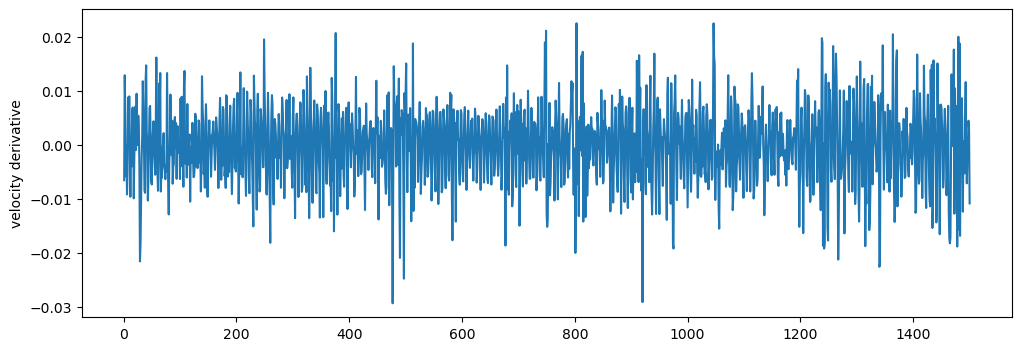

In [43]:
# Using normalized velocity
tide_data_interp['tide'][1:] = tide.u_normalized.diff(dim='u_normalized')
#tide_data_interp['tide'][1:] = tide.u.diff(dim='time')

plt.figure(figsize=(12,4))
tide_data_interp.tide.plot()
plt.ylabel("velocity derivative")

In [44]:
# new-one
tide_data_interp['high_tide'] = (tide_data_interp['tide'].shift(1) > 0) & (tide_data_interp['tide'] < 0)
tide_data_interp['low_tide'] = (tide_data_interp['tide'].shift(1) < 0) & (tide_data_interp['tide'] > 0)

# Initialize tidal_cycle column
tide_data_interp['tidal_cycle'] = None

# Classify high tide and low tide points
tide_data_interp.loc[tide_data_interp['high_tide'], 'tidal_cycle'] = 'high_tide'
tide_data_interp.loc[tide_data_interp['low_tide'], 'tidal_cycle'] = 'low_tide'

# Classify flood tide and ebb tide intervals
tide_data_interp['tidal_cycle'].fillna(method='ffill', limit=1, inplace=True)
tide_data_interp['tidal_cycle'].fillna(method='bfill', limit=1, inplace=True)
tide_data_interp.loc[tide_data_interp['tidal_cycle'] == 'high_tide', 'tidal_cycle'] = 'ebb_tide'
tide_data_interp.loc[tide_data_interp['tidal_cycle'] == 'low_tide', 'tidal_cycle'] = 'flood_tide'

# Remove temporary columns
tide_data_interp.drop(['high_tide', 'low_tide'], axis=1, inplace=True)


In [45]:
for mama in tide_data_interp.tidal_cycle:
    print(mama)
del mama

None
flood_tide
flood_tide
flood_tide
ebb_tide
ebb_tide
None
flood_tide
flood_tide
flood_tide
ebb_tide
ebb_tide
ebb_tide
flood_tide
ebb_tide
flood_tide
flood_tide
ebb_tide
ebb_tide
ebb_tide
flood_tide
flood_tide
ebb_tide
flood_tide
ebb_tide
flood_tide
flood_tide
ebb_tide
ebb_tide
ebb_tide
None
None
flood_tide
flood_tide
flood_tide
None
ebb_tide
ebb_tide
ebb_tide
flood_tide
flood_tide
ebb_tide
ebb_tide
ebb_tide
flood_tide
flood_tide
flood_tide
None
ebb_tide
ebb_tide
ebb_tide
flood_tide
flood_tide
ebb_tide
ebb_tide
ebb_tide
flood_tide
flood_tide
flood_tide
ebb_tide
ebb_tide
ebb_tide
flood_tide
flood_tide
flood_tide
ebb_tide
ebb_tide
ebb_tide
None
flood_tide
flood_tide
flood_tide
ebb_tide
ebb_tide
None
None
flood_tide
flood_tide
flood_tide
ebb_tide
ebb_tide
None
flood_tide
flood_tide
flood_tide
ebb_tide
flood_tide
ebb_tide
ebb_tide
flood_tide
flood_tide
flood_tide
ebb_tide
flood_tide
ebb_tide
flood_tide
flood_tide
ebb_tide
flood_tide
flood_tide
ebb_tide
flood_tide
ebb_tide
flood_tide
ebb_

In [46]:
%%time
# Making Starting times in datetime format
from datetime import timedelta
start_time_prithvi = []
for pri in range(len(kkk2[0,:])):
    start_time_prithvi = np.append(start_time_prithvi,tide_data_interp['time'].iloc[0] + timedelta(hours = int(kkk2[0,pri])))
df1['time_start']= start_time_prithvi
del start_time_prithvi

CPU times: total: 12.6 s
Wall time: 12.7 s


In [47]:
%%time
# Finding the nearest tidal cycle
def find_nearest_tidal_cycle(time_start, tide_data_interp):
    nearest_time = tide_data_interp['time'].iloc[(tide_data_interp['time'] - time_start).abs().idxmin()]
    tidal_cycle = tide_data_interp.loc[tide_data_interp['time'] == nearest_time, 'tidal_cycle'].values[0]
    return tidal_cycle


data['tidal_cycle'] = df1['time_start'].apply(lambda x: find_nearest_tidal_cycle(x, tide_data_interp))
#data_askoy['tidal_cycle'] = df1['time_start'].apply(lambda x: find_nearest_tidal_cycle(x, tide_data_interp))


CPU times: total: 28.9 s
Wall time: 29 s


# GO Back and do the same to get data for askoy/Nordhordland

In [48]:
# converting to UTM before making ellipses
p = Proj(proj="utm",zone=33,ellps="WGS84",south=False)
data['x_end'], data['y_end'] = zip(*data.apply(lambda row: p(row['longitude_end'], row['latitude_end']), axis=1))
data_askoy['x_end'], data_askoy['y_end'] = zip(*data_askoy.apply(lambda row: p(row['longitude_end'], row['latitude_end']), axis=1))


-2.80285714e-06 0

-0.0012679242274024488 1

-0.002533045597664898 2

-0.0037981669679273467 3

-0.005063288338189796 4

-0.006328409708452244 5
-0.007593531078714693 6
-0.008858652448977142 7
-0.01012377381923959 8
-0.011388895189502039 9
-0.012654016559764487 10
-0.013919137930026937 11
-0.015184259300289386 12
-0.016449380670551836 13
-0.017714502040814286 14
-0.018979623411076733 15
-0.020244744781339183 16
-0.021509866151601633 17
-0.02277498752186408 18
-0.02404010889212653 19
-0.025305230262388977 20
-0.026570351632651427 21
-0.027835473002913877 22
-0.029100594373176324 23
-0.030365715743438774 24
-0.031630837113701224 25
-0.03289595848396367 26
-0.03416107985422612 27
-0.03542620122448857 28
-0.03669132259475102 29
-0.037956443965013464 30
-0.03922156533527592 31
-0.040486686705538365 32
-0.04175180807580081 33
-0.043016929446063265 34
-0.04428205081632571 35
-0.04554717218658816 36
-0.04681229355685061 37
-0.04807741492711306 38
-0.049342536297375506 39
-0.05060765766763795 4

(1000, 1000000)

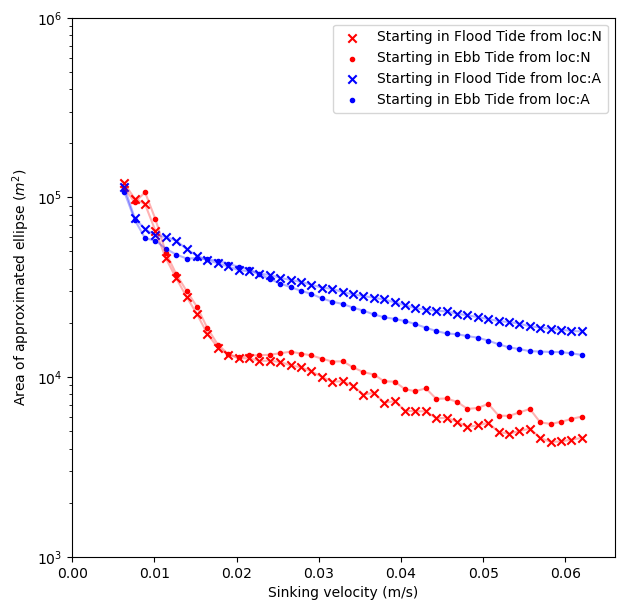

In [49]:
# Calculation of ellipses area 

#For both askoy and nordhordland
import scipy.stats as stats
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.colorbar as mcb
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from sklearn.decomposition import PCA

# here everything with suffix 1 belongs to ebbtide

dim = []
dim1 = []
dim_askoy = []
dim1_askoy = []

fig , ax = plt.subplots(figsize=(7,7))
scaling_factor=1
for i, label in enumerate(sink_velocity):
    print(label,i)
    # Filter the dataframe for the current size bin
    subset = data[data.tidal_cycle=="flood_tide"][data[data.tidal_cycle=="flood_tide"]['terminal_velocity'] == label][['x_end', 'y_end']]
    subset1 = data[data.tidal_cycle=="ebb_tide"][data[data.tidal_cycle=="ebb_tide"]['terminal_velocity'] == label][['x_end', 'y_end']]
    
    subset_askoy = data_askoy[data_askoy.tidal_cycle=="flood_tide"][data_askoy[data_askoy.tidal_cycle=="flood_tide"]['terminal_velocity'] == label][['x_end', 'y_end']]
    subset1_askoy = data_askoy[data_askoy.tidal_cycle=="ebb_tide"][data_askoy[data_askoy.tidal_cycle=="ebb_tide"]['terminal_velocity'] == label][['x_end', 'y_end']]

    # Apply PCA to the subset
    pca = PCA(n_components=2)
    pca.fit(subset)
    
    pca1 = PCA(n_components=2)
    pca1.fit(subset1)

    pca_askoy = PCA(n_components=2)
    pca_askoy.fit(subset_askoy)
    
    pca1_askoy = PCA(n_components=2)
    pca1_askoy.fit(subset1_askoy)

    # Calculate the angle of rotation based on the first principal component
    angle = np.degrees(-np.arctan2(*pca.components_[0]))
    angle1 = np.degrees(-np.arctan2(*pca1.components_[0]))

    angle_askoy = np.degrees(-np.arctan2(*pca_askoy.components_[0]))
    angle1_askoy = np.degrees(-np.arctan2(*pca1_askoy.components_[0]))

    
    # Get the mean and standard deviation
    x_mean, y_mean = pca.mean_
    major_axis_length = 2 * np.sqrt(pca.explained_variance_[0]) * scaling_factor 
    minor_axis_length = 2 * np.sqrt(pca.explained_variance_[1]) * scaling_factor
    angle = np.degrees(np.arctan2(pca.components_[0, 1], pca.components_[0, 0]))
    
    x_mean1, y_mean1 = pca1.mean_
    major_axis_length1 = 2 * np.sqrt(pca1.explained_variance_[0]) * scaling_factor 
    minor_axis_length1 = 2 * np.sqrt(pca1.explained_variance_[1]) * scaling_factor
    angle1 = np.degrees(np.arctan2(pca1.components_[0, 1], pca.components_[0, 0]))

    x_mean_askoy, y_mean_askoy = pca_askoy.mean_
    major_axis_length_askoy = 2 * np.sqrt(pca_askoy.explained_variance_[0]) * scaling_factor 
    minor_axis_length_askoy = 2 * np.sqrt(pca_askoy.explained_variance_[1]) * scaling_factor
    angle_askoy = np.degrees(np.arctan2(pca_askoy.components_[0, 1], pca_askoy.components_[0, 0]))
    
    x_mean1_askoy, y_mean1_askoy = pca1_askoy.mean_
    major_axis_length1_askoy = 2 * np.sqrt(pca1_askoy.explained_variance_[0]) * scaling_factor 
    minor_axis_length1_askoy = 2 * np.sqrt(pca1_askoy.explained_variance_[1]) * scaling_factor
    angle1_askoy = np.degrees(np.arctan2(pca1_askoy.components_[0, 1], pca_askoy.components_[0, 0]))

    area = np.pi*major_axis_length*minor_axis_length*(0.25)
    area1 = np.pi*major_axis_length1*minor_axis_length1*(0.25)
    dim.append(area)
    dim1.append(area1)
    
    area_askoy = np.pi*major_axis_length_askoy*minor_axis_length_askoy*(0.25)
    area1_askoy = np.pi*major_axis_length1_askoy*minor_axis_length1_askoy*(0.25)
    dim_askoy.append(area_askoy)
    dim1_askoy.append(area1_askoy)
    
    if -sink_velocity[i]<0.006:
        print('')
    else:
        plt.scatter(-sink_velocity[i],area,color='r',marker='x')
        plt.scatter(-sink_velocity[i],area1,color='r',marker='.')

        plt.scatter(-sink_velocity[i],area_askoy,color='b',marker='x')
        plt.scatter(-sink_velocity[i],area1_askoy,color='b',marker='.')

    
plt.scatter([],[],color='r',marker='x',label='Starting in Flood Tide from loc:N')
plt.scatter([],[],color='r',marker='.',label='Starting in Ebb Tide from loc:N')

plt.scatter([],[],color='b',marker='x',label='Starting in Flood Tide from loc:A')
plt.scatter([],[],color='b',marker='.',label='Starting in Ebb Tide from loc:A')


plt.plot(-sink_velocity[5:],dim[5:],color='r',alpha=0.3)
plt.plot(-sink_velocity[5:],dim1[5:],color='r',alpha=0.3)

plt.plot(-sink_velocity[5:],dim_askoy[5:],color='b',alpha=0.3)
plt.plot(-sink_velocity[5:],dim1_askoy[5:],color='b',alpha=0.3)

plt.yscale('log')
plt.legend()

plt.xlabel('Sinking velocity (m/s)')
plt.ylabel(r'Area of approximated ellipse $(m^2)$')
ax.set_xlim(0,0.066)
ax.set_ylim(1000,1000000)

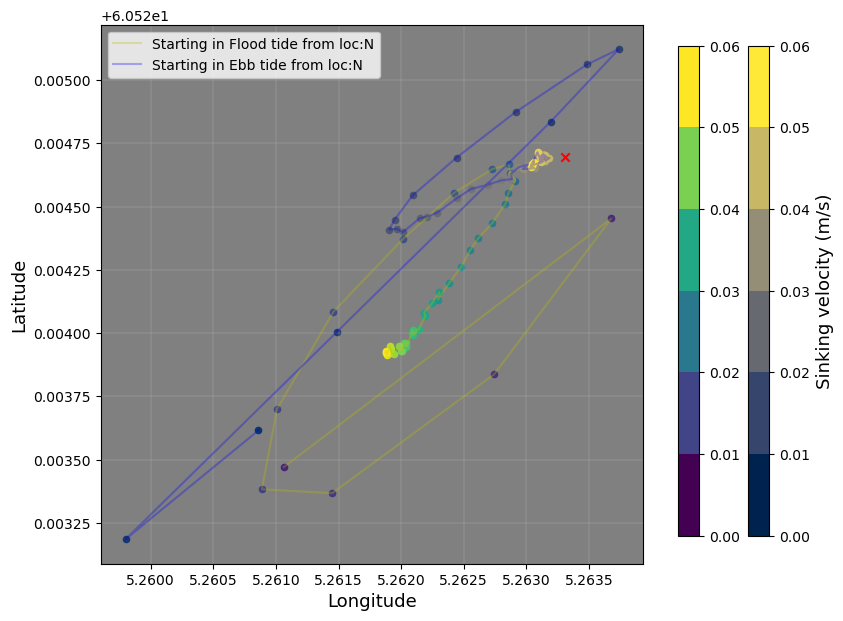

In [55]:
# Shift in mean locations

#Only nordhordland
import scipy.stats as stats
import seaborn as sns
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.colorbar as mcb
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from sklearn.decomposition import PCA



cmap = plt.get_cmap("viridis")
cmap = cm.get_cmap('viridis').copy()  # Make sure to copy the colormap
cmap.set_bad(color='grey')
fig, ax = plt.subplots(figsize=(7,7))
ax = plt.gca()
ax.patch.set_facecolor('grey')

colors = [cmap(i) for i in np.linspace(0, 1, 50)]

cmap1 = plt.get_cmap("cividis")
colors1 = [cmap1(i) for i in np.linspace(0, 1, 50)]

plt.grid(True)
plt.grid(color='silver', linestyle='-', linewidth=0.2)

# here everything with suffix 1 belongs to ebb_tide
dim_x = []
dim_y = []
dim_x1 = []
dim_y1 = []

scaling_factor=1
for i, label in enumerate(sink_velocity):
    #print(label,i)
    # Filter the dataframe for the current size bin
    subset = data[data.tidal_cycle=="flood_tide"][data[data.tidal_cycle=="flood_tide"]['terminal_velocity'] == label][['longitude_end', 'latitude_end']]
    subset1 = data[data.tidal_cycle=="ebb_tide"][data[data.tidal_cycle=="ebb_tide"]['terminal_velocity'] == label][['longitude_end', 'latitude_end']]
  
    # Apply PCA to the subset
    pca = PCA(n_components=2)
    pca.fit(subset)
    
    pca1 = PCA(n_components=2)
    pca1.fit(subset1)

    # Calculate the angle of rotation based on the first principal component
    angle = np.degrees(-np.arctan2(*pca.components_[0]))
    angle1 = np.degrees(-np.arctan2(*pca1.components_[0]))
    
    # Get the mean and standard deviation
    x_mean, y_mean = pca.mean_
    major_axis_length = 2 * np.sqrt(pca.explained_variance_[0]) * scaling_factor 
    minor_axis_length = 2 * np.sqrt(pca.explained_variance_[1]) * scaling_factor
    angle = np.degrees(np.arctan2(pca.components_[0, 1], pca.components_[0, 0]))
    
    x_mean1, y_mean1 = pca1.mean_
    major_axis_length1 = 2 * np.sqrt(pca1.explained_variance_[0]) * scaling_factor 
    minor_axis_length1 = 2 * np.sqrt(pca1.explained_variance_[1]) * scaling_factor
    angle1 = np.degrees(np.arctan2(pca1.components_[0, 1], pca.components_[0, 0]))


    dim_x.append(x_mean)
    dim_y.append(y_mean)
    dim_x1.append(x_mean1)
    dim_y1.append(y_mean1)

    if -sink_velocity[i]<0.006:
        print('')
    else:
        plt.scatter(x_mean1,y_mean1,color=colors1[i],s=20)
        plt.scatter(x_mean,y_mean,color=colors[i],s=20)
        

plt.plot(dim_x[5:],dim_y[5:],color='y',alpha=0.3,label='Starting in Flood tide from loc:N')
plt.plot(dim_x1[5:],dim_y1[5:],color='b',alpha=0.3,label='Starting in Ebb tide from loc:N')
plt.scatter(5.263310, 60.524696,marker='x',color='r')
plt.legend()
# Set labels and title
ax.set_xlabel('Longitude',fontsize=13)
ax.set_ylabel('Latitude',fontsize=13)

cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7]) # Adjust these values to position the colorbar
cbar_ax1 = fig.add_axes([1.05, 0.15, 0.03, 0.7])  # Adjust these values to position the colorbar for horizontal

# Get color map
# Create a norm object with your bins
norm = mcolors.BoundaryNorm(np.arange(7), cmap.N)
norm1 = mcolors.BoundaryNorm(np.arange(7), cmap1.N)

# Create a ColorbarBase object
cbar = mcb.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, boundaries=np.arange(7),ticks=np.arange(7), spacing='proportional', orientation='vertical')
#cbar.set_ticklabels([str(sink_velocity[::5][0])[0:20], str(sink_velocity[::5][1])[0:4],str(sink_velocity[::5][2])[0:4], str(sink_velocity[::5][3])[0:4],str(sink_velocity[::5][4])[0:4], str(sink_velocity[::5][5])[0:4],str(sink_velocity[::5][6])[0:4], str(sink_velocity[::5][7])[0:4],str(sink_velocity[::5][8])[0:4], str(sink_velocity[::5][9])[0:4]])
cbar.set_ticklabels(['0.00', '0.01','0.02','0.03','0.04','0.05','0.06'])

cbar1 = mcb.ColorbarBase(cbar_ax1, cmap=cmap1, norm=norm1, boundaries=np.arange(7), ticks=np.arange(7), spacing='proportional', orientation='vertical')
cbar1.set_ticklabels(['0.00', '0.01','0.02','0.03','0.04','0.05','0.06'])

cbar1.set_label('Sinking velocity (m/s)',fontsize=13)

# Show the plot
plt.show()






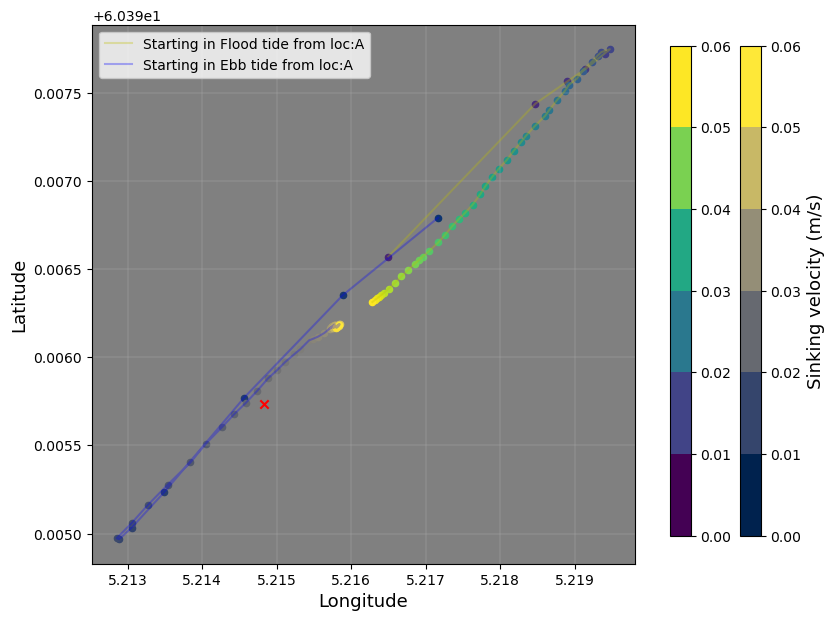

In [54]:
# Shift in mean locations

#For Askoy
import scipy.stats as stats
import seaborn as sns
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.colorbar as mcb
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from sklearn.decomposition import PCA



cmap = plt.get_cmap("viridis")
cmap = cm.get_cmap('viridis').copy()  # Make sure to copy the colormap
cmap.set_bad(color='grey')

fig, ax = plt.subplots(figsize=(7,7))
ax = plt.gca()
ax.patch.set_facecolor('grey')

colors = [cmap(i) for i in np.linspace(0, 1, 50)]

cmap1 = plt.get_cmap("cividis")
colors1 = [cmap1(i) for i in np.linspace(0, 1, 50)]

plt.grid(True)
plt.grid(color='silver', linestyle='-', linewidth=0.2)

# here everything with suffix 1 belongs to ebb_tide

dim_x_askoy = []
dim_y_askoy = []
dim_x_askoy1 = []
dim_y_askoy1 = []

scaling_factor=1
for i, label in enumerate(sink_velocity):
    #print(label,i)
    # Filter the dataframe for the current size bin
    subset_askoy = data_askoy[data_askoy.tidal_cycle=="flood_tide"][data_askoy[data_askoy.tidal_cycle=="flood_tide"]['terminal_velocity'] == label][['longitude_end', 'latitude_end']]
    subset1_askoy = data_askoy[data_askoy.tidal_cycle=="ebb_tide"][data_askoy[data_askoy.tidal_cycle=="ebb_tide"]['terminal_velocity'] == label][['longitude_end', 'latitude_end']]

    # Apply PCA to the subset
    pca_askoy = PCA(n_components=2)
    pca_askoy.fit(subset_askoy)
    
    pca1_askoy = PCA(n_components=2)
    pca1_askoy.fit(subset1_askoy)

    # Calculate the angle of rotation based on the first principal component
    angle_askoy = np.degrees(-np.arctan2(*pca_askoy.components_[0]))
    angle1_askoy = np.degrees(-np.arctan2(*pca1_askoy.components_[0]))

    
    # Get the mean and standard deviation
    x_mean_askoy, y_mean_askoy = pca_askoy.mean_
    major_axis_length_askoy = 2 * np.sqrt(pca_askoy.explained_variance_[0]) * scaling_factor 
    minor_axis_length_askoy = 2 * np.sqrt(pca_askoy.explained_variance_[1]) * scaling_factor
    angle_askoy = np.degrees(np.arctan2(pca_askoy.components_[0, 1], pca_askoy.components_[0, 0]))
    
    x_mean1_askoy, y_mean1_askoy = pca1_askoy.mean_
    major_axis_length1_askoy = 2 * np.sqrt(pca1_askoy.explained_variance_[0]) * scaling_factor 
    minor_axis_length1_askoy = 2 * np.sqrt(pca1_askoy.explained_variance_[1]) * scaling_factor
    angle1_askoy = np.degrees(np.arctan2(pca1_askoy.components_[0, 1], pca_askoy.components_[0, 0]))
    
    dim_x_askoy.append(x_mean_askoy)
    dim_y_askoy.append(y_mean_askoy)
    dim_x_askoy1.append(x_mean1_askoy)
    dim_y_askoy1.append(y_mean1_askoy)

    if -sink_velocity[i]<0.006:
        print('')
    else:
        plt.scatter(x_mean1_askoy,y_mean1_askoy,color=colors1[i],s=20)
        plt.scatter(x_mean_askoy,y_mean_askoy,color=colors[i],s=20)
        
    

plt.plot(dim_x_askoy[5:],dim_y_askoy[5:],color='y',alpha=0.3,label='Starting in Flood tide from loc:A')
plt.plot(dim_x_askoy1[5:],dim_y_askoy1[5:],color='b',alpha=0.3,label='Starting in Ebb tide from loc:A')
plt.scatter(5.214831, 60.395733,marker='x',color='r')
plt.legend()
# Set labels and title
ax.set_xlabel('Longitude',fontsize=13)
ax.set_ylabel('Latitude',fontsize=13)

cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7]) # Adjust these values to position the colorbar
cbar_ax1 = fig.add_axes([1.05, 0.15, 0.03, 0.7])  # Adjust these values to position the colorbar for horizontal

# Get color map
# Create a norm object with your bins
norm = mcolors.BoundaryNorm(np.arange(7), cmap.N)
norm1 = mcolors.BoundaryNorm(np.arange(7), cmap1.N)

# Create a ColorbarBase object
cbar = mcb.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, boundaries=np.arange(7),ticks=np.arange(7), spacing='proportional', orientation='vertical')
#cbar.set_ticklabels([str(sink_velocity[::5][0])[0:20], str(sink_velocity[::5][1])[0:4],str(sink_velocity[::5][2])[0:4], str(sink_velocity[::5][3])[0:4],str(sink_velocity[::5][4])[0:4], str(sink_velocity[::5][5])[0:4],str(sink_velocity[::5][6])[0:4], str(sink_velocity[::5][7])[0:4],str(sink_velocity[::5][8])[0:4], str(sink_velocity[::5][9])[0:4]])
cbar.set_ticklabels(['0.00', '0.01','0.02','0.03','0.04','0.05','0.06'])

cbar1 = mcb.ColorbarBase(cbar_ax1, cmap=cmap1, norm=norm1, boundaries=np.arange(7), ticks=np.arange(7), spacing='proportional', orientation='vertical')
cbar1.set_ticklabels(['0.00', '0.01','0.02','0.03','0.04','0.05','0.06'])

cbar1.set_label('Sinking velocity (m/s)',fontsize=13)


# Show the plot
plt.show()